In [3]:
# import yfinance as yf
import time
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [36]:
# df = yf.download(ticker, start='YYYY-MM-DD', end='YYYY-MM-DD')
df = yf.download('AXISBANK.NS', start = '2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
Date,,,,,
2020-01-01,745.452026,756.653222,743.958534,751.625142,4917748
2020-01-02,753.666260,755.707354,744.356785,746.746398,5156046
2020-01-03,739.726990,752.969280,737.287606,749.882753,8489729
2020-01-06,720.112366,736.391411,718.569102,736.242098,6356198
2020-01-07,722.601562,734.798420,717.921940,724.841802,9103360
...,...,...,...,...,...
2025-02-03,989.400024,1000.500000,983.349976,987.099976,7124605
2025-02-04,1015.299988,1017.099976,987.799988,994.000000,16058171


In [37]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = [col.split('_')[0] for col in df.columns]
df


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,745.452026,756.653222,743.958534,751.625142,4917748
2020-01-02,753.666260,755.707354,744.356785,746.746398,5156046
2020-01-03,739.726990,752.969280,737.287606,749.882753,8489729
2020-01-06,720.112366,736.391411,718.569102,736.242098,6356198
2020-01-07,722.601562,734.798420,717.921940,724.841802,9103360
...,...,...,...,...,...
2025-02-03,989.400024,1000.500000,983.349976,987.099976,7124605
2025-02-04,1015.299988,1017.099976,987.799988,994.000000,16058171
2025-02-05,1013.299988,1022.049988,1010.500000,1020.599976,7858373


In [38]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df = df.reset_index()['close']
df

0        745.452026
1        753.666260
2        739.726990
3        720.112366
4        722.601562
           ...     
1262     989.400024
1263    1015.299988
1264    1013.299988
1265    1020.700012
1266    1024.099976
Name: close, Length: 1267, dtype: float64

In [39]:
df1 = pd.DataFrame(df).to_numpy()
actual_value =df1[-1][0]
actual_value

np.float64(1024.0999755859375)

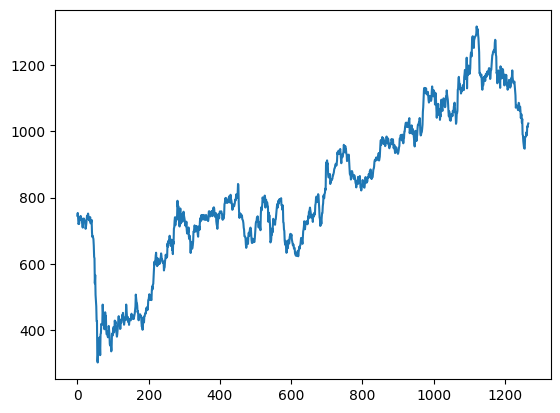

In [40]:
plt.plot(df)

In [41]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler (feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [42]:
df

array([[0.43686102],
       [0.44495016],
       [0.43122318],
       ...,
       [0.70062975],
       [0.70791708],
       [0.71126526]])

In [43]:
training_size=int(len(df)*0.8)
test_size=len (df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [44]:
training_size, test_size

(1013, 254)

In [45]:
# creating 60(or whatever you decided) batches
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [46]:
# reshape into X=t,t+1, t+2, t+3 and Y=t+4
time_step=60

X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)

In [47]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [14]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\work\Anunay\MBA_Project\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 1.5017e-04 - val_loss: 0.0011
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 1.2151e-04 - val_loss: 9.5025e-04
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 1.2781e-04 - val_loss: 9.2257e-04
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 1.3239e-04 - val_loss: 0.0019
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 1.1355e-04 - val_loss: 8.3709e-04
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 9.8201e-05 - val_loss: 9.7242e-04
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 1.0271e-04 - val_loss: 8.1497e-04
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 1.0724e-04 - val_loss: 6.1708e-04
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 8.1762e-05 - val_loss: 7.4289e-04
Epoch 11/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 8.5508e

In [14]:
from keras.models import load_model

In [ ]:
from keras.models import load_model

# Save the model
model.save('lstm_model.h5')
print("Model saved to disk")

In [48]:
model = load_model('Model/AxisBK_Pred_model.h5')

In [49]:
import tensorflow as tf

In [50]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [51]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

773.5960423786851

In [53]:
###23 Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1162.7471451856989

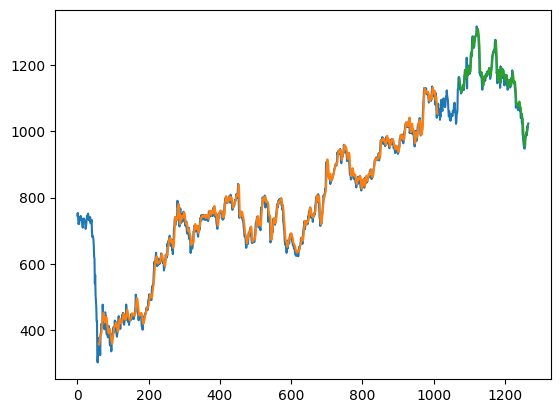

In [54]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
df=scaler.fit_transform(np.array(df).reshape(-1,1))
x_input = df[-62:-2].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [56]:
lst_output=[]
n_steps=time_step
i=0
while(i<1):
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
yhat=scaler.inverse_transform(yhat)

[0.7023038]
61


In [57]:
yhat

array([[0.7023038]], dtype=float32)